In [ ]:
#Q1
'''
Design a system for a library. Include classes for Book, Patron, and Library.

The Book class should have attributes for title, author, ISBN, and a method is_available() that returns True if the book is not currently checked out and False otherwise. It should also have a method check_out() that marks the book as checked out and a method check_in() that marks it as available.
The Patron class should have attributes for name and patron ID and a method borrow_book(book) that associates a book with the patron.
The Library class should have a collection of Book objects and Patron objects. It should have methods to add_book(book), add_patron(patron), lend_book(book, patron), and return_book(book). The lend_book method should only allow a book to be lent if it's available and the patron exists in the library.
Implement the classes and their methods.
'''

In [1]:
class Book:
    def __init__(self, title, author, isbn):
        self.title = title
        self.author = author
        self.isbn = isbn
        self._checked_out = False

    def is_available(self):
        return not self._checked_out

    def check_out(self):
        if not self._checked_out:
            self._checked_out = True
        else:
            raise ValueError("Book is already checked out.")

    def check_in(self):
        self._checked_out = False

    def __repr__(self):
        status = "Available" if self.is_available() else "Checked out"
        return f"<Book {self.title} by {self.author} ({status})>"


class Patron:
    def __init__(self, name, patron_id):
        self.name = name
        self.patron_id = patron_id
        self.borrowed_books = []

    def borrow_book(self, book):
        self.borrowed_books.append(book)

    def return_book(self, book):
        if book in self.borrowed_books:
            self.borrowed_books.remove(book)

    def __repr__(self):
        return f"<Patron {self.name} (ID: {self.patron_id})>"


class Library:
    def __init__(self):
        self.books = []
        self.patrons = []

    def add_book(self, book):
        self.books.append(book)

    def add_patron(self, patron):
        self.patrons.append(patron)

    def lend_book(self, book, patron):
        if book not in self.books:
            raise ValueError("Book does not belong to this library.")
        if patron not in self.patrons:
            raise ValueError("Patron is not registered with the library.")
        if not book.is_available():
            raise ValueError("Book is not available.")

        book.check_out()
        patron.borrow_book(book)

    def return_book(self, book):
        if book not in self.books:
            raise ValueError("Book does not belong to this library.")

        book.check_in()
        for patron in self.patrons:
            patron.return_book(book)


In [7]:
def test_library_system():
    # Create library
    library = Library()

    # Create books
    book1 = Book("1984", "George Orwell", "123456")
    book2 = Book("Brave New World", "Aldous Huxley", "654321")

    # Create patrons
    patron1 = Patron("Alice", 1)
    patron2 = Patron("Bob", 2)

    # Add books and patrons to library
    library.add_book(book1)
    library.add_book(book2)
    library.add_patron(patron1)
    library.add_patron(patron2)

    # Initial availability
    assert book1.is_available() is True
    assert book2.is_available() is True

    # Lend a book
    library.lend_book(book1, patron1)
    assert book1.is_available() is False
    assert book1 in patron1.borrowed_books

    # Attempt to lend the same book again (should fail)
    try:
        library.lend_book(book1, patron2)
    except ValueError as e:
        print("Expected error:", e)

    # Return the book
    library.return_book(book1)
    assert book1.is_available() is True
    assert book1 not in patron1.borrowed_books

    # Borrow again after return
    library.lend_book(book1, patron2)
    assert book1 in patron2.borrowed_books

    # Attempt to lend a book to an unregistered patron
    unregistered_patron = Patron("Charlie", 3)
    try:
        library.lend_book(book2, unregistered_patron)
    except ValueError as e:
        print("Expected error:", e)

    print("All tests passed!")


# Run the tests
test_library_system()


Expected error: Book is not available.
Expected error: Patron is not registered with the library.
All tests passed!


In [ ]:
#Q2
'''
Create an base class Shape with an method area() and another method perimeter(). Then, create classes Rectangle and Circle that inherit from Shape and implement the area() method. The perimeter() method in Shape should raise a NotImplementedError. Implement the perimeter() method in Rectangle and Circle.
'''

In [8]:
import math


class Shape:
    def area(self):
        raise NotImplementedError("Subclasses must implement area()")

    def perimeter(self):
        raise NotImplementedError("Subclasses must implement perimeter()")


class Rectangle(Shape):
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

    def perimeter(self):
        return 2 * (self.width + self.height)


class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return math.pi * self.radius ** 2

    def perimeter(self):
        return 2 * math.pi * self.radius


In [9]:
def test_shapes():
    rectangle = Rectangle(4, 5)
    circle = Circle(3)

    # Test Rectangle
    assert rectangle.area() == 20
    assert rectangle.perimeter() == 18

    # Test Circle (allow small floating-point tolerance)
    assert abs(circle.area() - (math.pi * 9)) < 1e-9
    assert abs(circle.perimeter() - (2 * math.pi * 3)) < 1e-9

    # Test base class behavior
    shape = Shape()
    try:
        shape.area()
    except NotImplementedError:
        print("Expected error: Shape.area() not implemented")

    try:
        shape.perimeter()
    except NotImplementedError:
        print("Expected error: Shape.perimeter() not implemented")

    print("All tests passed!")


# Run the tests
test_shapes()


Expected error: Shape.area() not implemented
Expected error: Shape.perimeter() not implemented
All tests passed!


In [20]:
#Q3
'''
Design a system to model different types of employees in a company. There should be a base Employee class with attributes for name and employee_id. Create two subclasses: SalariedEmployee with an attribute for monthly_salary and a method calculate_paycheck() that returns the monthly salary, and HourlyEmployee with attributes for hourly_rate and hours_worked, and a calculate_paycheck() method that returns the total pay for the week. Demonstrate creating instances of both employee types and calling their calculate_paycheck() methods.
'''

'\nDesign a system to model different types of employees in a company. There should be a base Employee class with attributes for name and employee_id. Create two subclasses: SalariedEmployee with an attribute for monthly_salary and a method calculate_paycheck() that returns the monthly salary, and HourlyEmployee with attributes for hourly_rate and hours_worked, and a calculate_paycheck() method that returns the total pay for the week. Demonstrate creating instances of both employee types and calling their calculate_paycheck() methods.\n'

In [18]:
class Employee:
    def __init__(self, name, employee_id):
        self.name = name
        self.employee_id = employee_id


class SalariedEmployee(Employee):
    def __init__(self, name, employee_id, monthly_salary):
        super().__init__(name, employee_id)
        self.monthly_salary = monthly_salary

    def calculate_paycheck(self):
        return self.monthly_salary


class HourlyEmployee(Employee):
    def __init__(self, name, employee_id, hourly_rate, hours_worked):
        super().__init__(name, employee_id)
        self.hourly_rate = hourly_rate
        self.hours_worked = hours_worked

    def calculate_paycheck(self):
        return self.hourly_rate * self.hours_worked


In [11]:
def test_employee_paychecks():
    # Create employees
    salaried_emp = SalariedEmployee("Alice", 101, 5000)
    hourly_emp = HourlyEmployee("Bob", 102, 20, 40)

    # Calculate paychecks
    salaried_pay = salaried_emp.calculate_paycheck()
    hourly_pay = hourly_emp.calculate_paycheck()

    # Assertions
    assert salaried_pay == 5000
    assert hourly_pay == 800

    # Output for demonstration
    print(f"{salaried_emp.name}'s paycheck: ${salaried_pay}")
    print(f"{hourly_emp.name}'s paycheck: ${hourly_pay}")

    print("All tests passed!")


# Run tests
test_employee_paychecks()


Alice's paycheck: $5000
Bob's paycheck: $800
All tests passed!


In [17]:
#Q4
'''
Design a class polynomial of one variable which will have attributes degree, a positive integer and coefficients, a list of floating point numbers. degree means the highest power of the variable and coefficients are the coefficient of individual terms.

A polynomial of degree n has n+1 coefficients.

Example-1:
This is a polynomial of degree 4 and coefficients are [3, 5, 1, 9, 10].

Example-2: (some coefficients could be zero)
Here the degree of polynomial is 3 and coefficients are [0.7, 0, 2.5, 0].

A polynomial of degree zero is just a constant value.

In the polynomial class, you need to implement the following methods:

evaluate(x) which will evaluate the polynomial for a given value of the variable x.
plot([x1, x2]) this will plot the polynomial for a given range of x1 to x2 of the variable.
derivative(x) This will evaluate the derivative (differentiation) of the polynomial for a given value of the variable x.
plot_derivative([x1, x2]) this will plot the derivative of the polynomial for a given range of x1 to x2 of the variable.
The class should have basic checks, such that the number of coefficients provided by the user should be degree + 1 and the degree should be a positive integer.
'''

'\nDesign a class polynomial of one variable which will have attributes degree, a positive integer and coefficients, a list of floating point numbers. degree means the highest power of the variable and coefficients are the coefficient of individual terms.\n\nA polynomial of degree n has n+1 coefficients.\n\nExample-1:\nThis is a polynomial of degree 4 and coefficients are [3, 5, 1, 9, 10].\n\nExample-2: (some coefficients could be zero)\nHere the degree of polynomial is 3 and coefficients are [0.7, 0, 2.5, 0].\n\nA polynomial of degree zero is just a constant value.\n\nIn the polynomial class, you need to implement the following methods:\n\nevaluate(x) which will evaluate the polynomial for a given value of the variable x.\nplot([x1, x2]) this will plot the polynomial for a given range of x1 to x2 of the variable.\nderivative(x) This will evaluate the derivative (differentiation) of the polynomial for a given value of the variable x.\nplot_derivative([x1, x2]) this will plot the deriva

In [13]:
import matplotlib.pyplot as plt
import numpy as np


class Polynomial:
    def __init__(self, degree, coefficients):
        # Basic validation
        if not isinstance(degree, int) or degree < 0:
            raise ValueError("Degree must be a non-negative integer.")
        if len(coefficients) != degree + 1:
            raise ValueError("Number of coefficients must be degree + 1.")

        self.degree = degree
        self.coefficients = coefficients

    def evaluate(self, x):
        """Evaluate the polynomial at x."""
        result = 0.0
        for i, coeff in enumerate(self.coefficients):
            power = self.degree - i
            result += coeff * (x ** power)
        return result

    def derivative(self, x):
        """Evaluate the derivative of the polynomial at x."""
        if self.degree == 0:
            return 0.0

        result = 0.0
        for i, coeff in enumerate(self.coefficients[:-1]):
            power = self.degree - i
            result += coeff * power * (x ** (power - 1))
        return result

    def plot(self, x_range):
        """Plot the polynomial over the range [x1, x2]."""
        x1, x2 = x_range
        x_vals = np.linspace(x1, x2, 400)
        y_vals = [self.evaluate(x) for x in x_vals]

        plt.plot(x_vals, y_vals, label="Polynomial")
        plt.xlabel("x")
        plt.ylabel("P(x)")
        plt.title("Polynomial Plot")
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_derivative(self, x_range):
        """Plot the derivative of the polynomial over the range [x1, x2]."""
        x1, x2 = x_range
        x_vals = np.linspace(x1, x2, 400)
        y_vals = [self.derivative(x) for x in x_vals]

        plt.plot(x_vals, y_vals, label="Derivative", color="red")
        plt.xlabel("x")
        plt.ylabel("P'(x)")
        plt.title("Derivative Plot")
        plt.legend()
        plt.grid(True)
        plt.show()


Polynomial 1 evaluation at x=2: 120.0
Polynomial 1 derivative at x=2: 169.0
Polynomial 2 evaluation at x=1.5: 6.1125
Polynomial 2 derivative at x=1.5: 7.225
Degree zero polynomial at x=10: 5.0
Derivative of degree zero polynomial: 0.0


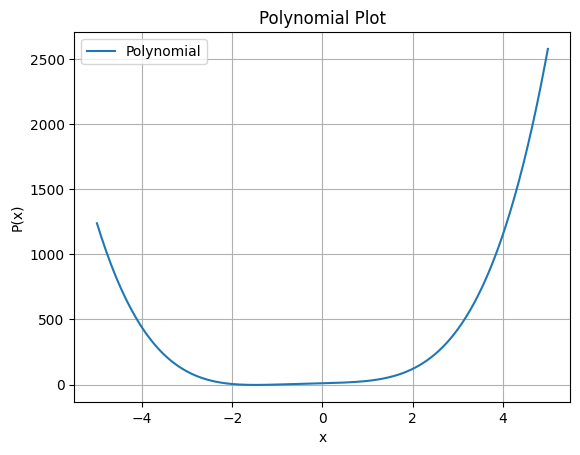

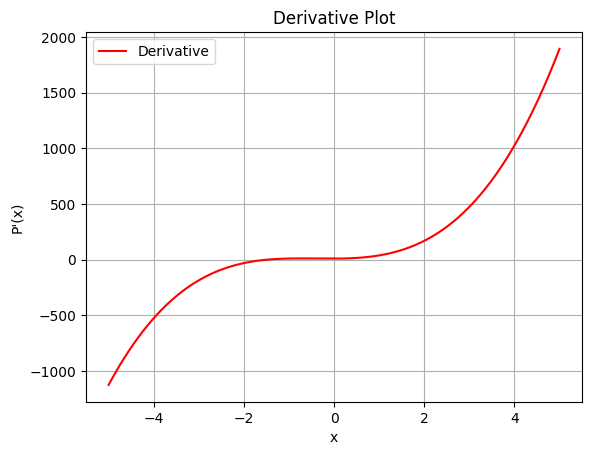

All tests completed successfully!


In [14]:
def test_polynomial():
    # Example 1
    p1 = Polynomial(4, [3, 5, 1, 9, 10])  # 3x^4 + 5x^3 + x^2 + 9x + 10
    x = 2

    print("Polynomial 1 evaluation at x=2:", p1.evaluate(x))
    print("Polynomial 1 derivative at x=2:", p1.derivative(x))

    # Example 2 (with zero coefficients)
    p2 = Polynomial(3, [0.7, 0, 2.5, 0])  # 0.7x^3 + 2.5x
    x = 1.5

    print("Polynomial 2 evaluation at x=1.5:", p2.evaluate(x))
    print("Polynomial 2 derivative at x=1.5:", p2.derivative(x))

    # Degree zero polynomial
    p3 = Polynomial(0, [5])
    print("Degree zero polynomial at x=10:", p3.evaluate(10))
    print("Derivative of degree zero polynomial:", p3.derivative(10))

    # Plotting
    p1.plot([-5, 5])
    p1.plot_derivative([-5, 5])

    print("All tests completed successfully!")


# Run tests
test_polynomial()


In [21]:
#Q5
'''
Design a system to model a simple online shopping cart. Create a class Product with attributes for name and price. Then, create a ShoppingCart class that has a list to store Product objects. Implement methods to add_item(product), remove_item(product_name), and calculate_total().
'''

'\nDesign a system to model a simple online shopping cart. Create a class Product with attributes for name and price. Then, create a ShoppingCart class that has a list to store Product objects. Implement methods to add_item(product), remove_item(product_name), and calculate_total().\n'

In [15]:
class Product:
    def __init__(self, name, price):
        if price < 0:
            raise ValueError("Price cannot be negative.")
        self.name = name
        self.price = price

    def __repr__(self):
        return f"{self.name} (${self.price:.2f})"


class ShoppingCart:
    def __init__(self):
        self.items = []

    def add_item(self, product):
        self.items.append(product)

    def remove_item(self, product_name):
        for product in self.items:
            if product.name == product_name:
                self.items.remove(product)
                return True
        return False  # Item not found

    def calculate_total(self):
        return sum(product.price for product in self.items)


In [16]:
def test_shopping_cart():
    # Create products
    apple = Product("Apple", 0.5)
    banana = Product("Banana", 0.3)
    milk = Product("Milk", 1.2)

    # Create shopping cart
    cart = ShoppingCart()

    # Add items
    cart.add_item(apple)
    cart.add_item(banana)
    cart.add_item(milk)

    # Test total calculation
    assert cart.calculate_total() == 2.0
    print("Total after adding items:", cart.calculate_total())

    # Remove an item
    removed = cart.remove_item("Banana")
    assert removed is True
    assert cart.calculate_total() == 1.7
    print("Total after removing Banana:", cart.calculate_total())

    # Try removing an item not in cart
    removed = cart.remove_item("Bread")
    assert removed is False
    print("Attempted to remove Bread (not in cart)")

    print("All tests passed!")


# Run tests
test_shopping_cart()


Total after adding items: 2.0
Total after removing Banana: 1.7
Attempted to remove Bread (not in cart)
All tests passed!
